
📌 Exploring Dataset:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved



📌 Exploring DataTypes of Features:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
me

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN



📌 Null count:


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Total nulls: 0
📌 Visualizing Label Imbalance of Target(Loan Status):


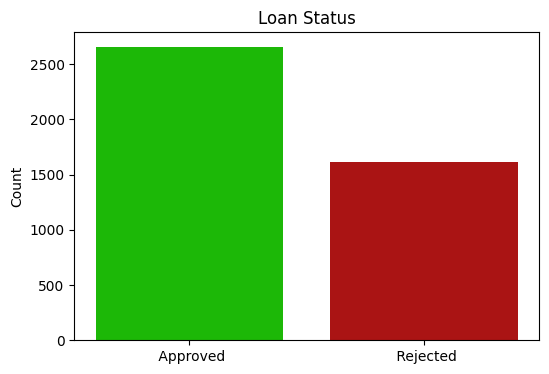

Label ratios in
  loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64



📌 Logistic Regression Results:

Precision Score: 0.8836104513064132
Recall Score: 0.9117647058823529
F1 Score: 0.8974668275030157
Cross-val mean: 0.8922569669937948
Fold scores: [0.89072165 0.88607595 0.90041494 0.91060291 0.87346939]

Conclusion:
 Model is consistent: no skweed or lucky splits


📌 SMOTE Results:

Precision Score: 0.859375
Recall Score: 0.9436274509803921
F1 Score: 0.8995327102803738
Cross-val mean: 0.8922569669937948
Fold scores: [0.89072165 0.88607595 0.90041494 0.91060291 0.87346939]

Conclusion:
 Model is less precise: more false positives found
Since the business model cares more about avoiding false positives(unwanted approvals),
 we won't use SMOTE for the next model



📌 Decision Tree Results:

Precision Score: 0.9897435897435898
Recall Score: 0.946078431372549
F1 Score: 0.9674185463659147
Cross-val mean: 0.9692661937455818
Fold scors: [0.97228145 0.9686847

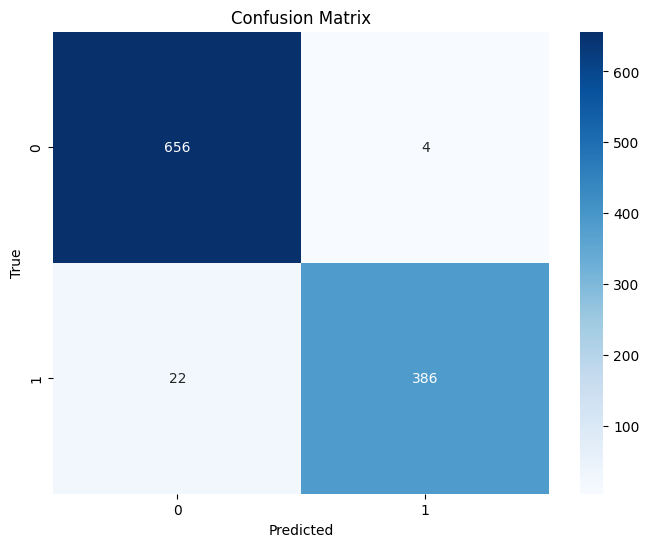

📌 F1-Score Comparison of Models


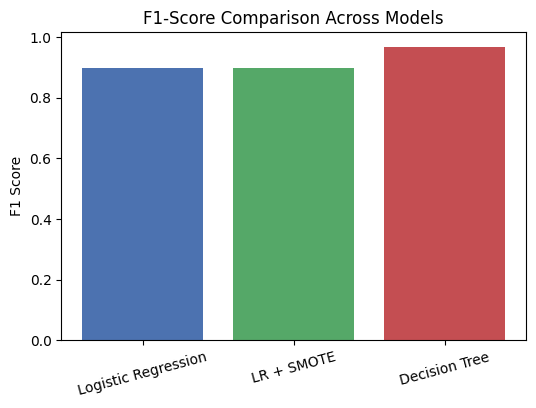

📌 Model Performance Summary
- Logistic Regression:   Precision=0.859 | Recall=0.944 | F1=0.897
- Logistic Regression + SMOTE: Precision=lower | Recall=higher | F1=0.900
- Decision Tree:        Precision=0.990 | Recall=0.946 | F1=0.967

🏆 Conclusion:
Decision Tree performed best: high precision & strong recall balance.
Logistic Regression was decent, but SMOTE introduced too many false positives.
From a business perspective (avoid false approvals), Decision Tree is the safest model.


In [ ]:
#📦 Step 1: Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

#📂 Step 2: Reading the dataset
df = pd.read_csv('./loan_approval_dataset.csv')

#🧹 Step 3: Explore & Clean the dataset
print("\n📌 Exploring Dataset:")
display(df)

print("\n📌 Exploring DataTypes of Features:\n")
print(df.info(),'\n')

print("\n📌 Exploring Unique & Frequent Values in Features:")
display(df.describe(include='all'))

print("\n📌 Null count:")
display(df.isnull().sum())
print("Total nulls:", df.isnull().sum().sum())

#🎯 Step 4: Assign Target & Features
y = df[' loan_status']
x = df.drop(columns=[' loan_status', 'loan_id'])

numerical = x.drop(columns=[' education', ' self_employed'])
categorical = x[[' education',' self_employed']].copy()

#📊 Step 5: Visualize relationships
 # evaluating label imbalance in target
print("\n📌 Visualizing Label Imbalance of Target(Loan Status):")
plt.figure(figsize=(6, 4))
plt.bar(y.unique(),y.value_counts(), color=["#1CB807", "#AA1414"])
plt.ylabel('Count')
plt.title("Loan Status")
plt.show()

print("Label ratios in\n", df[' loan_status'].value_counts(normalize=True))
print('\n')

#🛠️ Step 6: Feature Preparation
 # encoding categoric features
le = LabelEncoder()
categorical[' education'] = le.fit_transform(categorical[' education'])
categorical[' self_employed'] = le.fit_transform(categorical[' self_employed'])

y_ready = le.fit_transform(y)
 # scaling numeric features
scaler = StandardScaler()
scaled = scaler.fit_transform(numerical)
numerical = pd.DataFrame(scaled, columns=scaler.get_feature_names_out())

x_ready = pd.concat([numerical,categorical],axis=1)

#✂️ Step 7: Splitting the dataset into training & testing sets
x_train, x_test, y_train, y_test = train_test_split(x_ready, y_ready, test_size=0.25, random_state=1)

#🤖 Step 8: Training Logistic Regression Model
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)

#🔍 Step 9: Predict & Visualize Logistic Regression Outputs
prediction = lr.predict(x_test)

print("\n📌 Logistic Regression Results:\n")
print("Precision Score:", precision_score(y_test, prediction))
print("Recall Score:", recall_score(y_test, prediction))
 # storing f1 score for comparison
f1_scores = [f1_score(y_test, prediction)]
print("F1 Score:", f1_scores[0])

cross_vals = cross_val_score(lr, x_train, y_train, cv=5, scoring='f1')
print("Cross-val mean:", cross_vals.mean())
print("Fold scores:", cross_vals)
print("\nConclusion:\n Model is consistent: no skweed or lucky splits\n")

#⚖️ Step 10: Applying SMOTE Technique
smote = SMOTE(random_state=1)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

#🤖 Step 11: Training Logistic Regression Model using SMOTE
lr.fit(x_train_balanced, y_train_balanced)

#🔍 Step 12: Checking SMOTE Outputs
prediction = lr.predict(x_test)

print("\n📌 SMOTE Results:\n")
print("Precision Score:", precision_score(y_test, prediction))
print("Recall Score:", recall_score(y_test, prediction))
 # storing f1 score for comparison
f1_scores.append(f1_score(y_test, prediction))
print("F1 Score:", f1_scores[1])

cross_vals = cross_val_score(lr, x_train, y_train, cv=5, scoring='f1')
print("Cross-val mean:", cross_vals.mean())
print("Fold scores:", cross_vals)
print("\nConclusion:\n Model is less precise: more false positives found")
print("Since the business model cares more about avoiding false positives(unwanted approvals),\n we won't use SMOTE for the next model\n\n")

#🌳 Step 13: Training Decision Tree Model
dtc = DecisionTreeClassifier(
    min_samples_leaf= 10,
    min_samples_split= 2,
    max_depth= 7,
    random_state=1
)

dtc.fit(x_train, y_train)

#🔍 Step 14: Predict & Visualize Decision Tree Outputs
prediction = dtc.predict(x_test)

print("\n📌 Decision Tree Results:\n")
print("Precision Score:", precision_score(y_test, prediction))
print("Recall Score:", recall_score(y_test, prediction))
 # storing f1 score for comparison
f1_scores.append(f1_score(y_test, prediction))
print("F1 Score:", f1_scores[2])

cross_vals = cross_val_score(dtc, x_train, y_train, cv=5, scoring='f1')
print("Cross-val mean:", cross_vals.mean())
print("Fold scors:", cross_vals)
print("\nConclusion:\n Model is consistent: no skweed or lucky splits")

# 📊 Step 15: Evaluate & Compare Model Performance

print("\n📌 Confusion Matrix")
 # visualizing confusion matrix via heatmap
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


print("\n📌 F1-Score Comparison of Models")
 # compare F1-scores from the 3 approaches
names = ['Logistic Regression', 'LR + SMOTE', 'Decision Tree']

plt.figure(figsize=(6,4))
plt.bar(names, f1_scores, color=["#4C72B0", "#55A868", "#C44E52"])
plt.title("F1-Score Comparison Across Models")
plt.ylabel("F1 Score")
plt.xticks(rotation=15)
plt.show()

 # 📝 Performance Report
print("\n📌 Model Performance Summary")
print("- Logistic Regression:   Precision=%.3f | Recall=%.3f | F1=%.3f" %
      (precision_score(y_test, lr.predict(x_test)),
       recall_score(y_test, lr.predict(x_test)),
       f1_scores[0]))
print("- Logistic Regression + SMOTE: Precision=lower | Recall=higher | F1=%.3f" %
      f1_scores[1])
print("- Decision Tree:        Precision=%.3f | Recall=%.3f | F1=%.3f" %
      (precision_score(y_test, dtc.predict(x_test)),
       recall_score(y_test, dtc.predict(x_test)),
       f1_scores[2]))

 # ✅ Final conclusion
print("\n🏆 Conclusion:")
print("Decision Tree performed best: high precision & strong recall balance.")
print("Logistic Regression was decent, but SMOTE introduced too many false positives.")
print("From a business perspective (avoid false approvals), Decision Tree is the safest model.")


# 🏦 Loan Approval Prediction — Final Takeaways

- **Baseline Logistic Regression** → decent performance, but missed too many risky approvals.  
- **Logistic Regression + SMOTE** → improved recall, but created more false approvals (bad for business).  
- **Decision Tree (depth=7)** → best balance with **higher precision & F1-score**, making it the most suitable model.  

✅ **Business Impact**:  
Using the Decision Tree, the bank can **minimize false approvals** (protecting against loan defaults) while still granting loans to genuine applicants.  

📊 **Next Steps**:  
- Deploy Decision Tree with regular monitoring.  
- Explore ensemble methods (e.g., Random Forest, XGBoost) for potential performance gains.  
- Integrate explainability (feature importance) to show loan officers which factors drive approvals.